In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
Life_exp = pd.read_csv('Life Expectancy Data.csv')
Life_exp.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
# Removing unnecessary spaces by replacing them with the underscore '_'
Life_exp.columns = Life_exp.columns.str.strip().str.replace(' ','_')
# renaming a column name appropriately
Life_exp.rename(columns = {'thinness__1-19_years':'thinness_1-19_years'}, inplace=True)
print(f'Adjusted columns names: \n\n{list(Life_exp.columns)}')

Adjusted columns names: 

['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling']


In [12]:
Life_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [13]:
# Displaying the float values with 2 decimal places
pd.options.display.float_format = '{:.2f}'.format
Life_exp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.00,2007.52,4.61,2000.00,2004.00,2008.00,2012.00,2015.00
Life_expectancy,2928.00,69.22,9.52,36.30,63.10,72.10,75.70,89.00
Adult_Mortality,2928.00,164.80,124.29,1.00,74.00,144.00,228.00,723.00
infant_deaths,2938.00,30.30,117.93,0.00,0.00,3.00,22.00,1800.00
Alcohol,2744.00,4.60,4.05,0.01,0.88,3.75,7.70,17.87
percentage_expenditure,2938.00,738.25,1987.91,0.00,4.69,64.91,441.53,19479.91
Hepatitis_B,2385.00,80.94,25.07,1.00,77.00,92.00,97.00,99.00
Measles,2938.00,2419.59,11467.27,0.00,0.00,17.00,360.25,212183.00
BMI,2904.00,38.32,20.04,1.00,19.30,43.50,56.20,87.30
under-five_deaths,2938.00,42.04,160.45,0.00,0.00,4.00,28.00,2500.00


In [14]:
Life_exp.describe(include = 'O')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


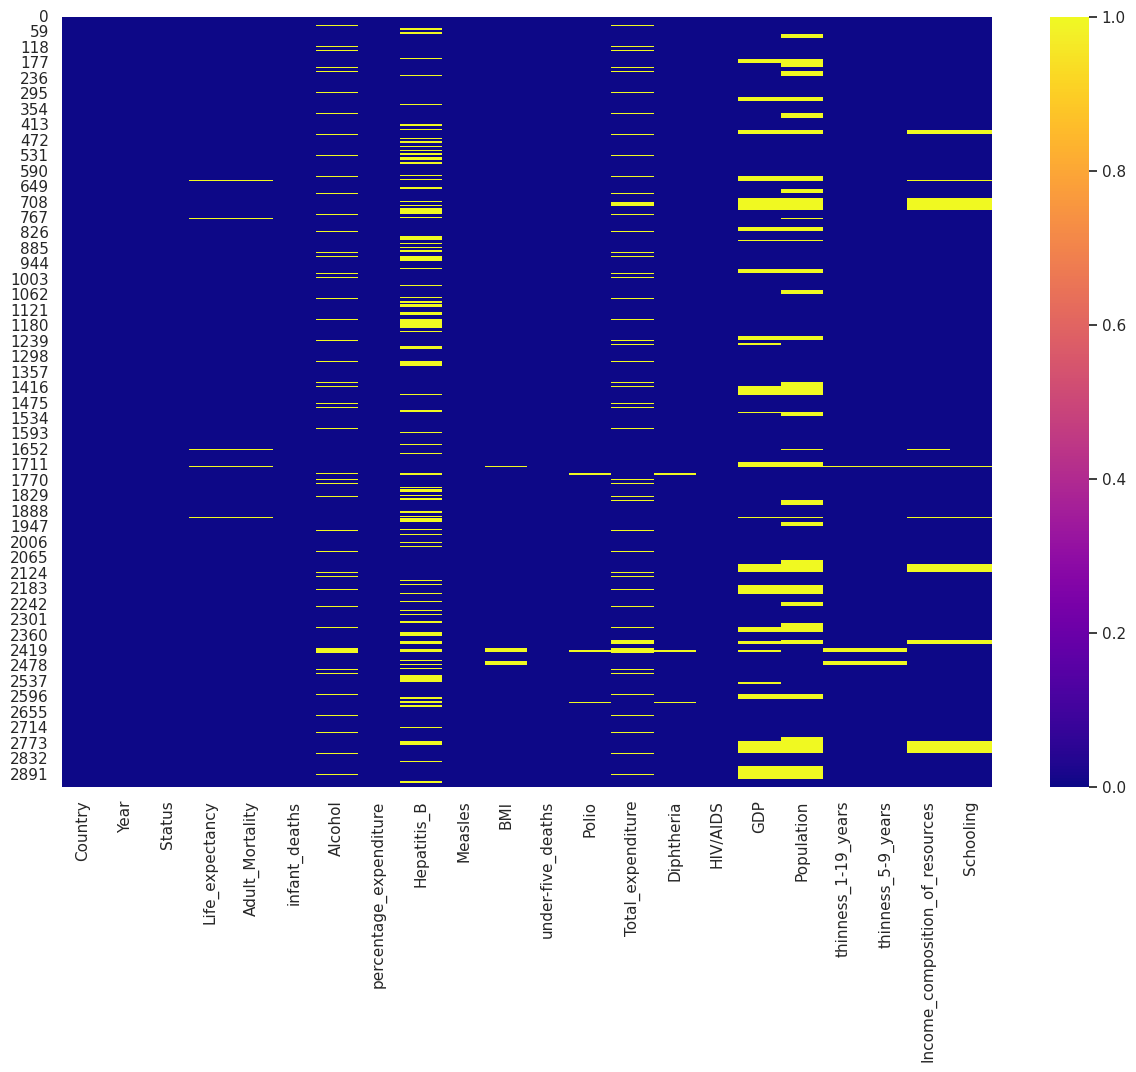

In [15]:
# visual representation of the missing value within the dataset
plt.figure(figsize=(15, 10))
sns.heatmap(Life_exp.isna(), cmap='plasma')
plt.show()

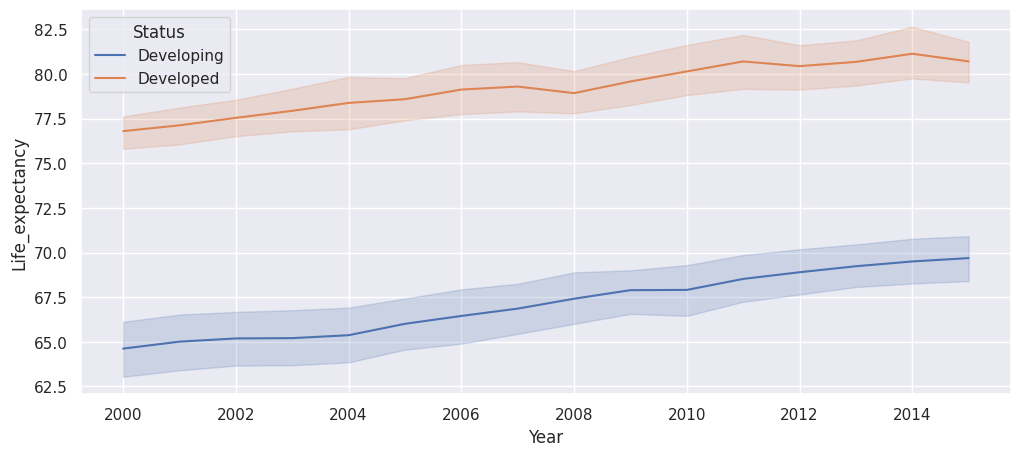

In [16]:
# Life expectancy over the years based on the country status
plt.figure(figsize=(12,5))
sns.lineplot(Life_exp, x='Year', y='Life_expectancy', hue='Status')
plt.show()

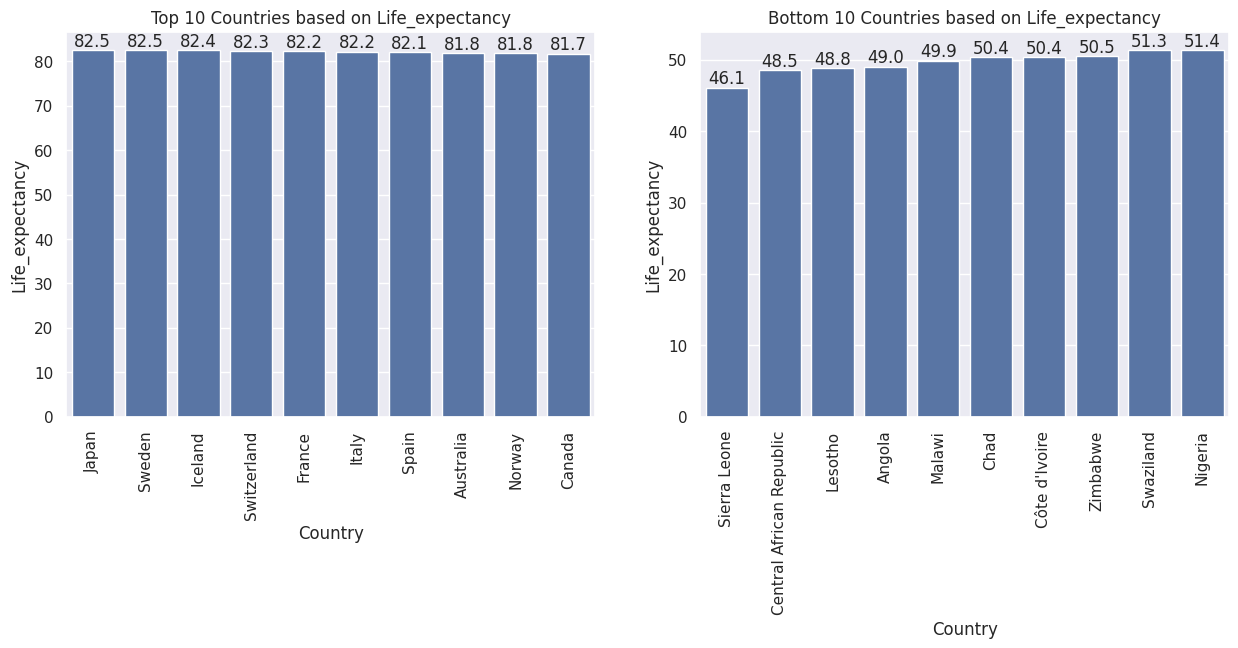

In [17]:
top_data = pd.DataFrame(Life_exp.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = False).head(10))
bottom_data = pd.DataFrame(Life_exp.groupby('Country')['Life_expectancy'].mean().sort_values(ascending = True).head(10))

# Display of top and bottom 10 countries on Life_expectancy

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Top 10 Countries based on Life_expectancy')
ax1 = sns.barplot(top_data, x = top_data.index, y = 'Life_expectancy')
ax1.bar_label(ax1.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Bottom 10 Countries based on Life_expectancy')
ax2 = sns.barplot(bottom_data,x = bottom_data.index, y = 'Life_expectancy')
ax2.bar_label(ax2.containers[0], fmt = '%.1f')
plt.xticks(rotation=90)
plt.show()

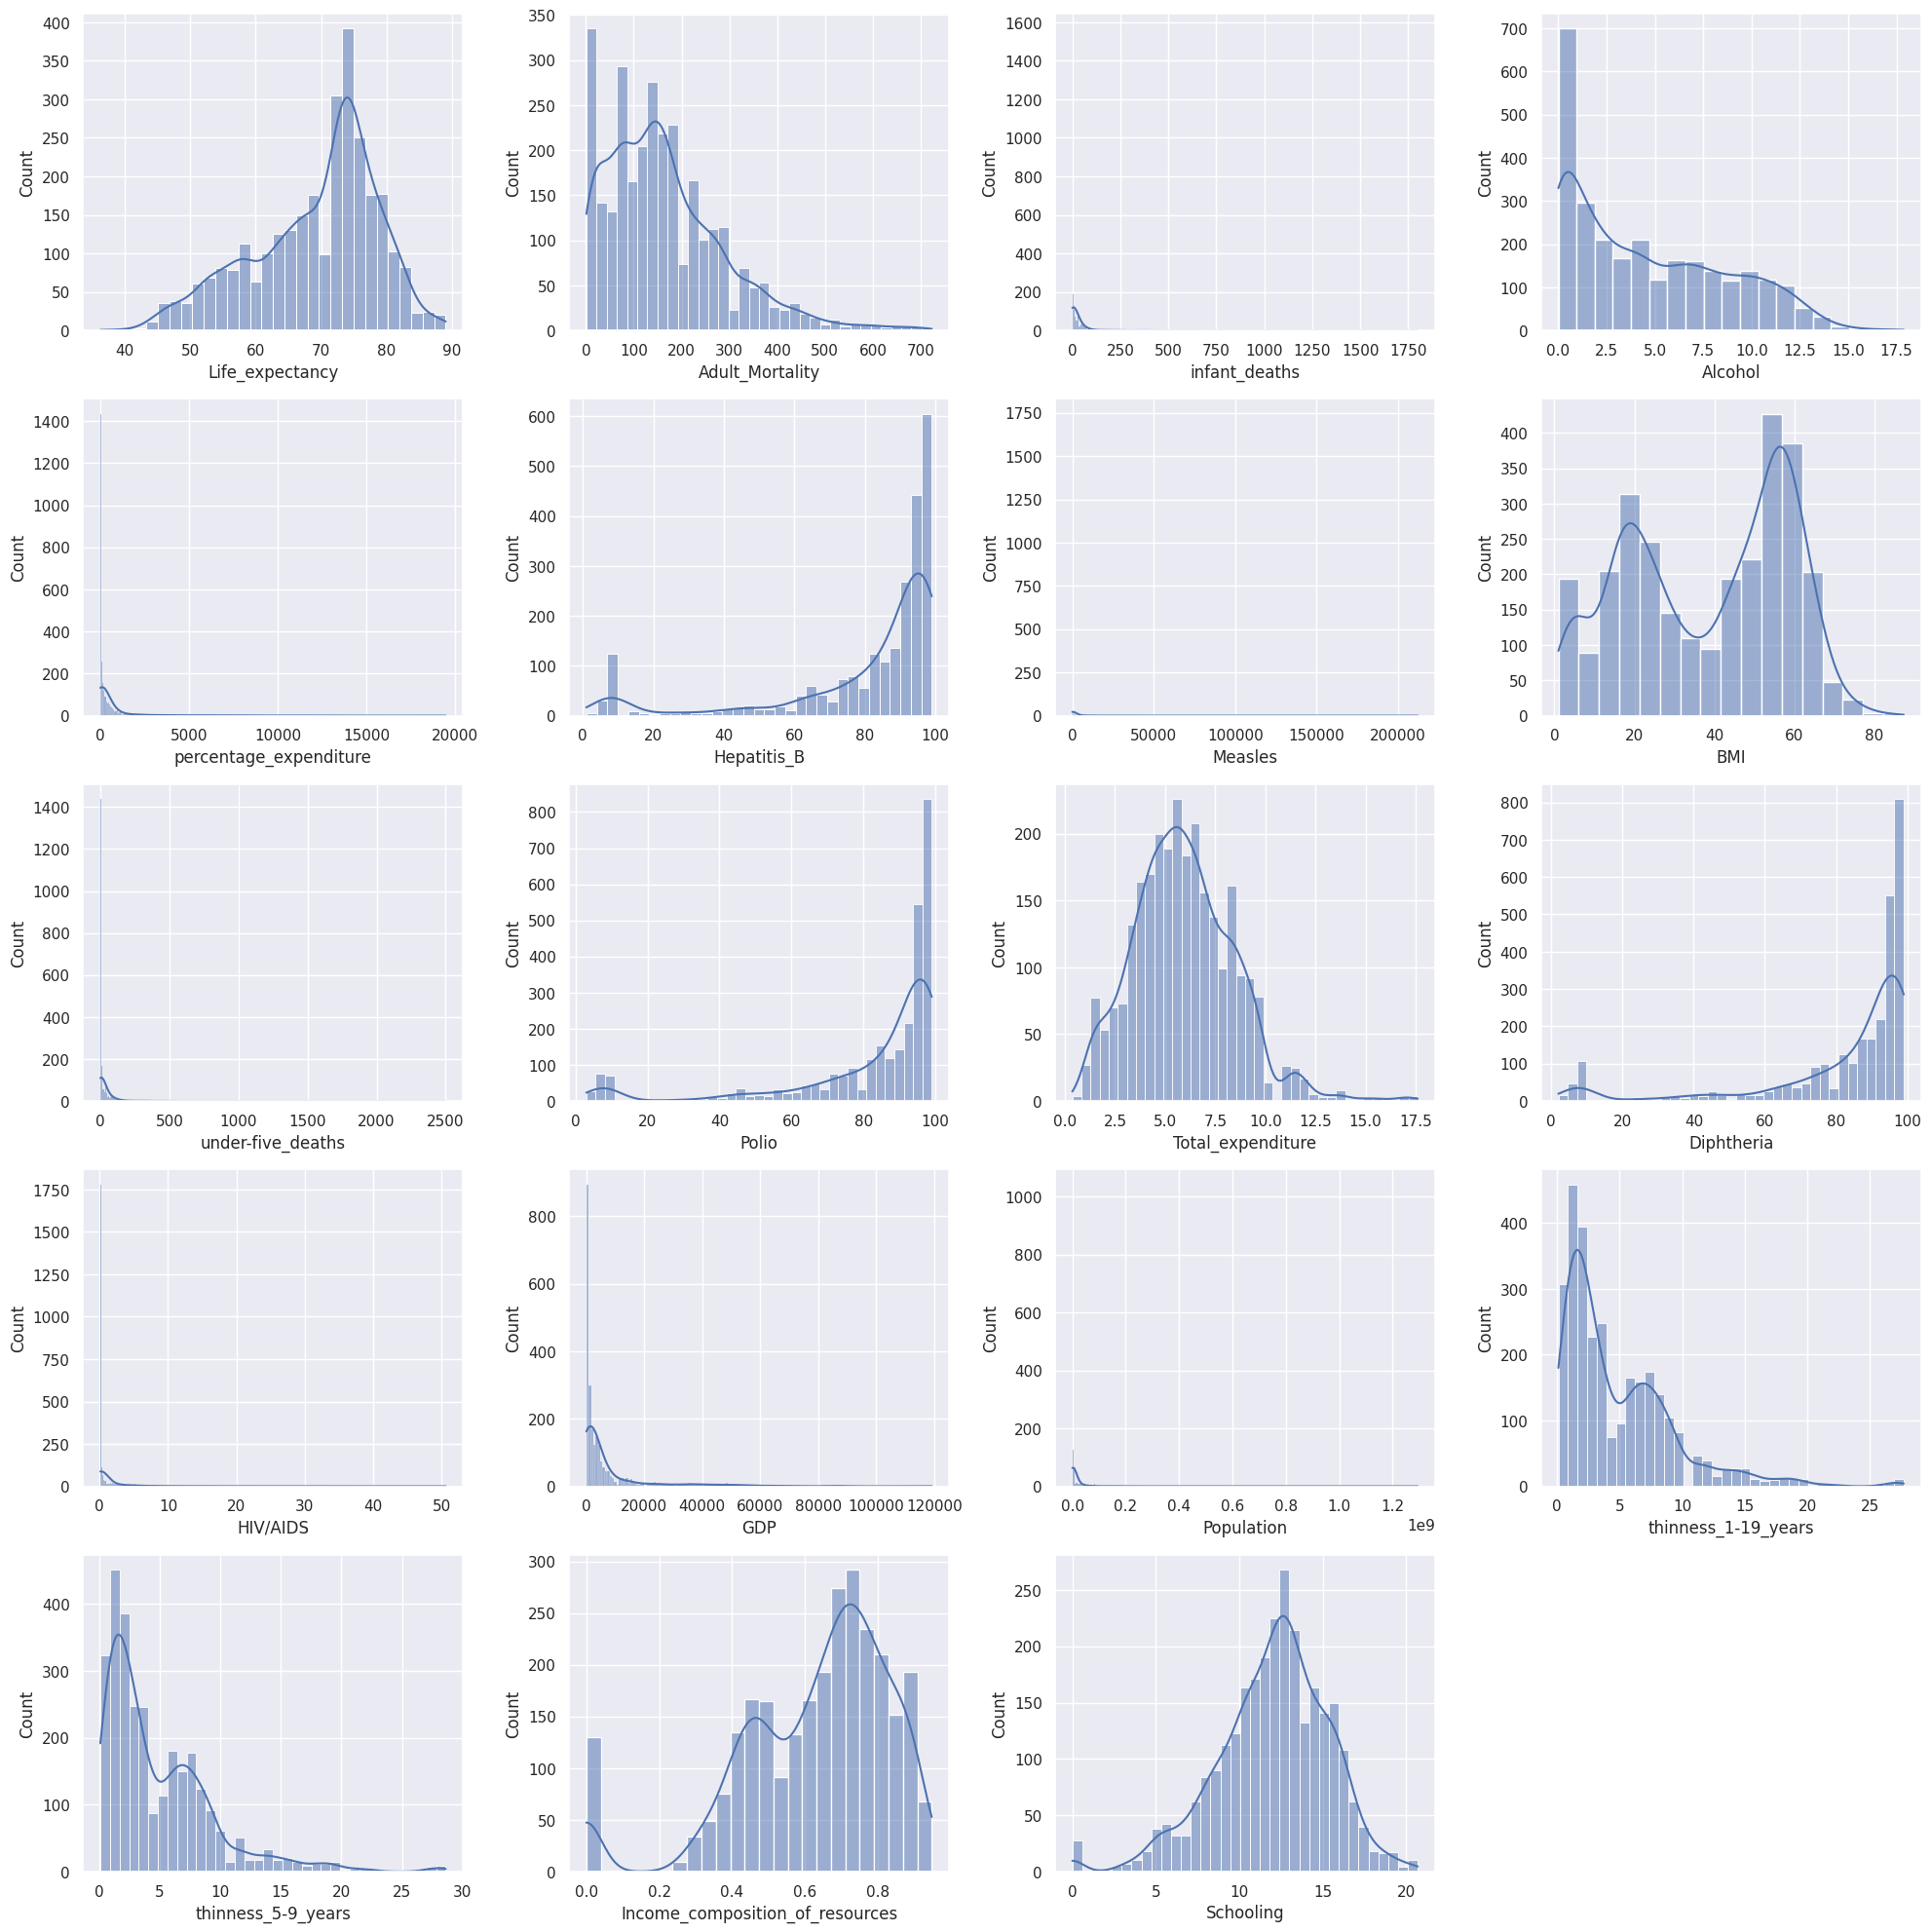

In [18]:
#Separating the numerical features from the dataset

num_df = Life_exp.select_dtypes(include=np.number)
num_df.drop(['Year'], axis = 1, inplace = True)
# Checking the distribution of each feature using histogram

plt.figure(figsize=(20,20))
for col in range(len(num_df.columns)):
    plt.subplot(5,4,col+1)
    sns.histplot(num_df,x = num_df.columns[col], kde=True)
plt.tight_layout()
plt.show()


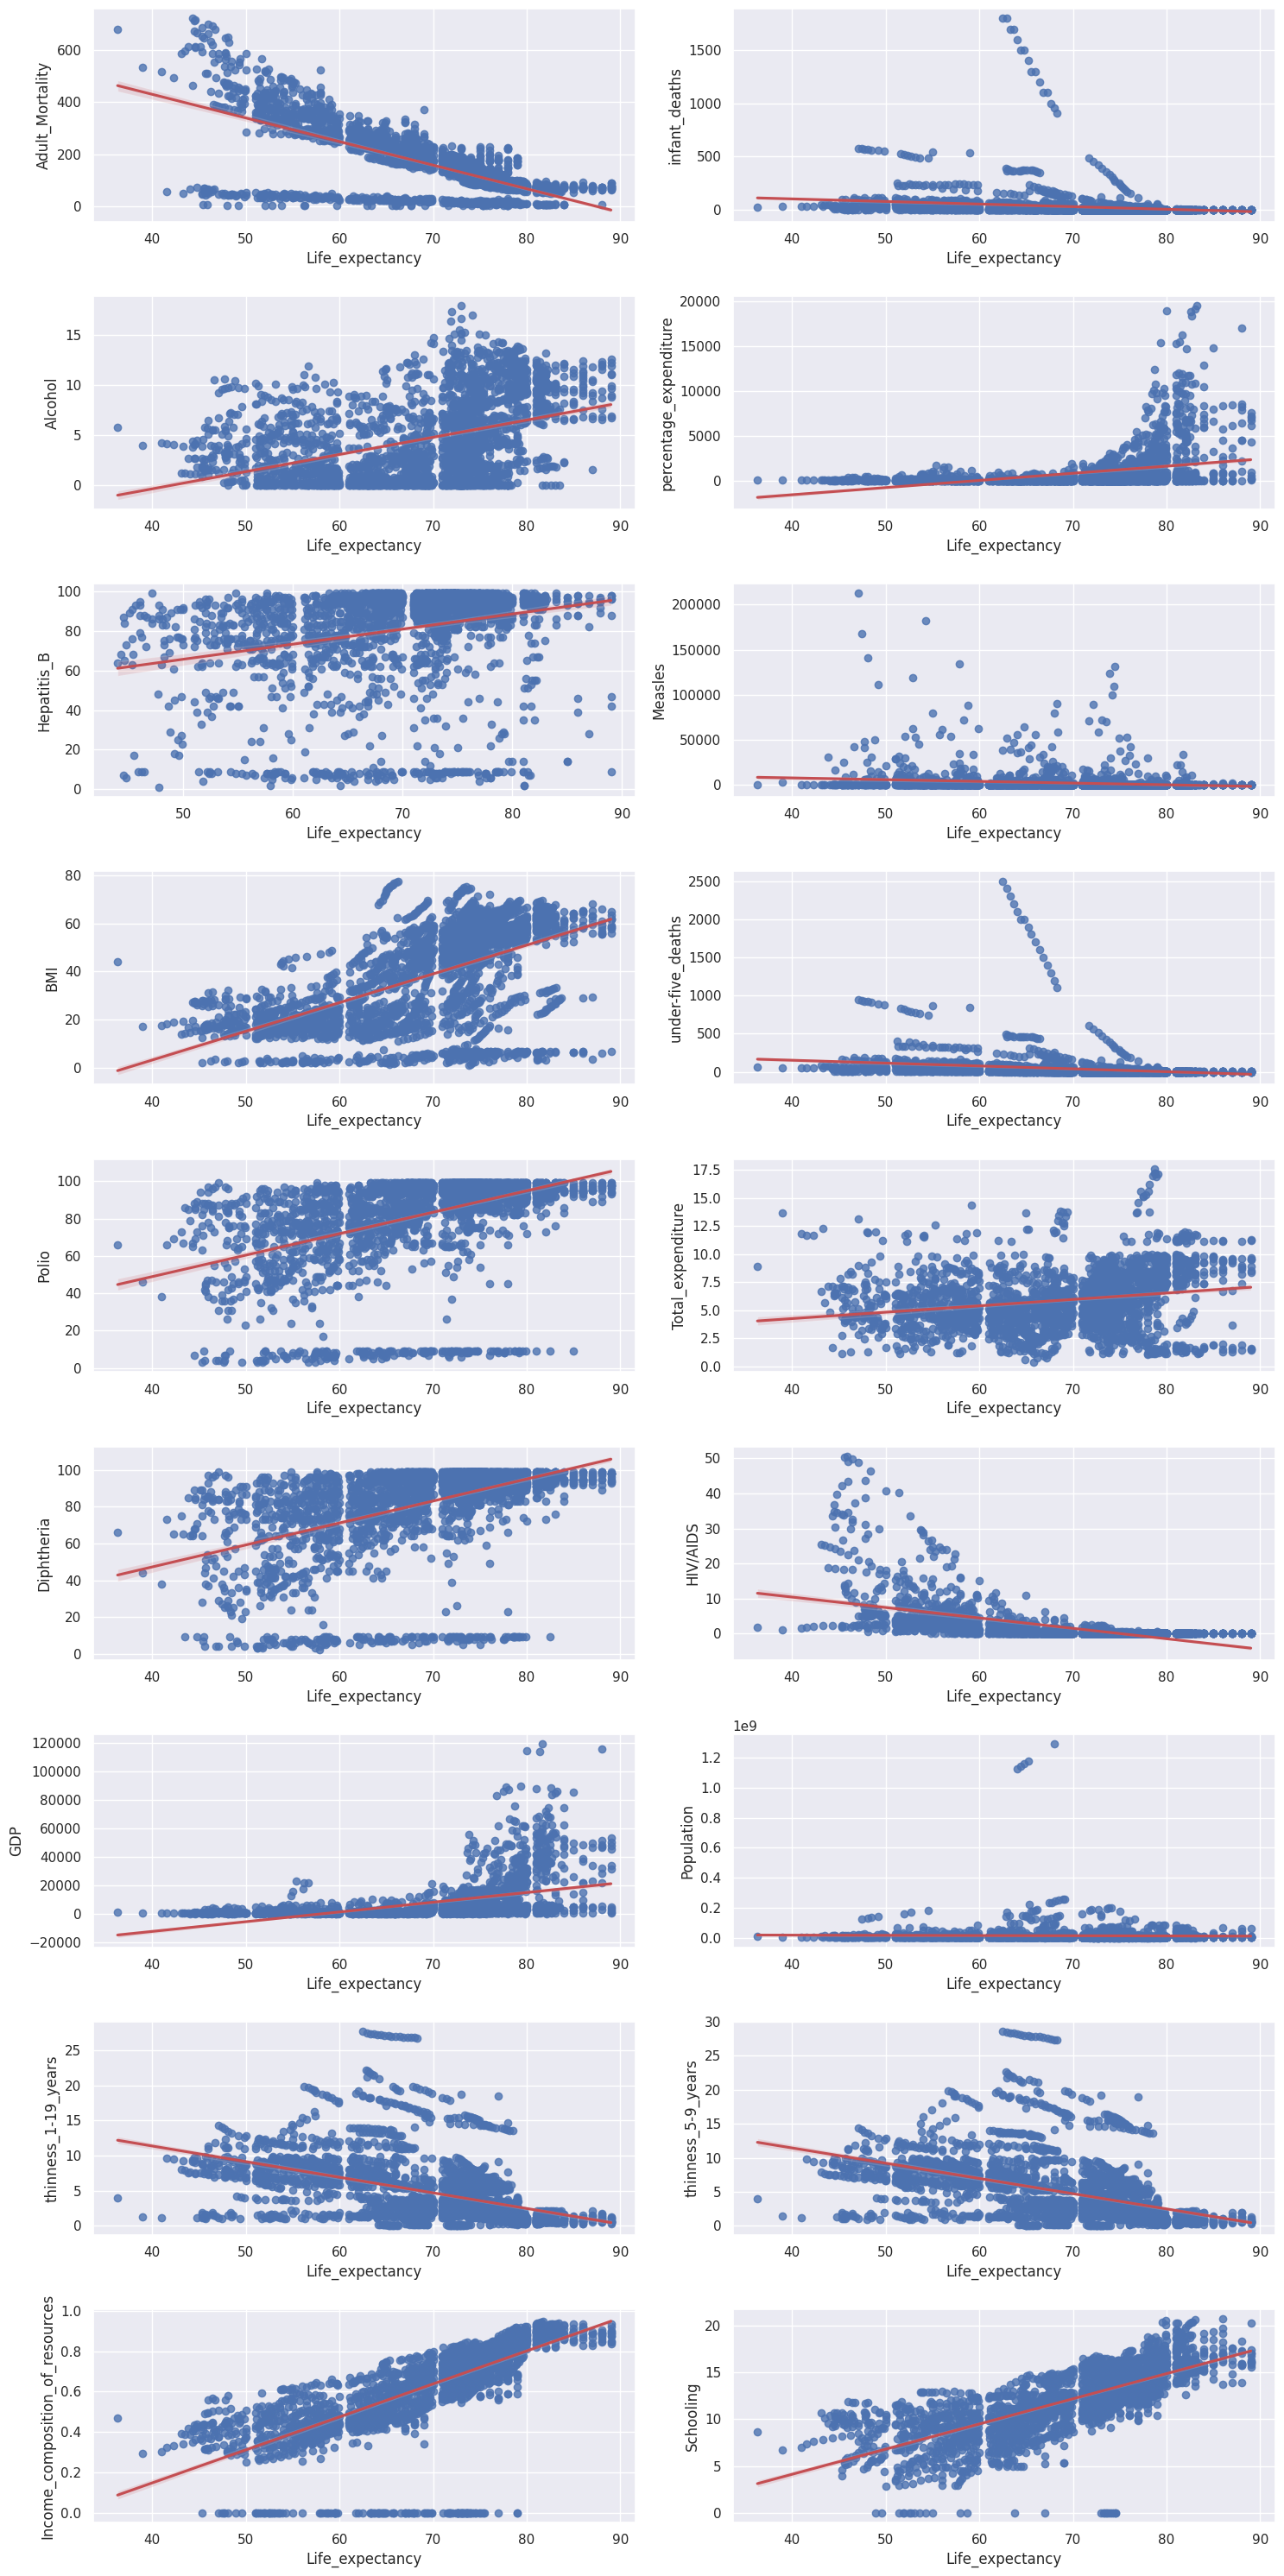

In [19]:
# Visualising the linera relationship between Life_expectancy and other features of the dataset

plt.figure(figsize=(15,30))
for col in range(1,len(num_df.columns)):
    plt.subplot(9,2,col)
    sns.regplot(num_df, y = num_df.columns[col], x = 'Life_expectancy', line_kws = {'color' : 'r'})
plt.tight_layout()
plt.show()

In [22]:
# Splitting the dependent and independent variables of the dataset

features_df = Life_exp.drop(['Life_expectancy', 'Year'], axis = 1)
target_df = Life_exp.Life_expectancy

columns = list(features_df.columns)
columns.remove('Country')
# number of Null values in the independent variables
print(f'number of NULL values in each column with in Features dataframe: \n\n{features_df.isna().sum()}')

number of NULL values in each column with in Features dataframe: 

Country                              0
Status                               0
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [23]:
# Splitting the dependent and independent variables of the dataset

features_df = Life_exp.drop(['Life_expectancy', 'Year'], axis = 1)
target_df = Life_exp.Life_expectancy

columns = list(features_df.columns)
columns.remove('Country')
# number of Null values in the independent variables
print(f'number of NULL values in each column with in Features dataframe: \n\n{features_df.isna().sum()}')

number of NULL values in each column with in Features dataframe: 

Country                              0
Status                               0
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [24]:
# Splitting the dependent and independent variables of the dataset

features_df = Life_exp.drop(['Life_expectancy', 'Year'], axis = 1)
target_df = Life_exp.Life_expectancy

columns = list(features_df.columns)
columns.remove('Country')
# number of Null values in the independent variables
print(f'number of NULL values in each column with in Features dataframe: \n\n{features_df.isna().sum()}')

number of NULL values in each column with in Features dataframe: 

Country                              0
Status                               0
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under-five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64


In [27]:
# Number of NULL values with the Target variable
print(f'number of NULL values within the Target variable: {target_df.isna().sum()}')

# Isolating the categorical and numerical values independently in the features dataframe
num_features = features_df.select_dtypes(include=np.number).columns.tolist()
cat_features = features_df.select_dtypes(include=['object']).columns.tolist()

print('Numerical Features: \n')
print(num_features, '\n')
print('Categorical Features: \n')
print(cat_features)

number of NULL values within the Target variable: 10
Numerical Features: 

['Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'] 

Categorical Features: 

['Country', 'Status']


In [28]:
features_df.copy()
features_df.drop(columns=['Country', 'Status'], inplace=True, axis=0) # dropping the non-numerical features
# Standardizing the numerical values so as not to overwelm the model with far extreme values

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.set_output(transform='pandas')
scaled_num_features = pd.DataFrame(scaler.fit_transform(features_df), columns=features_df.columns)
scaled_num_features.head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,0.79,0.27,-1.13,-0.34,-0.64,-0.11,-0.96,0.26,-3.27,0.89,-0.73,-0.32,-0.48,0.34,2.80,2.76,-0.70,-0.56
1,0.85,0.29,-1.13,-0.33,-0.76,-0.17,-0.98,0.27,-1.05,0.90,-0.86,-0.32,-0.48,-0.20,2.86,2.80,-0.72,-0.59
2,0.83,0.30,-1.13,-0.33,-0.68,-0.17,-1.01,0.29,-0.88,0.88,-0.77,-0.32,-0.48,0.31,2.91,2.85,-0.75,-0.62
3,0.86,0.33,-1.13,-0.33,-0.56,0.03,-1.03,0.32,-0.66,1.03,-0.65,-0.32,-0.48,-0.15,2.96,2.91,-0.78,-0.65
4,0.89,0.35,-1.13,-0.37,-0.52,0.05,-1.05,0.34,-0.62,0.77,-0.60,-0.32,-0.52,-0.16,3.02,2.96,-0.82,-0.74
